In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1250",
    database="olist"
)

In [3]:
price_review_sql = """
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
    	AVG(reviews.review_score) AS avg_review_score,
        AVG(order_items.price) AS avg_price
    FROM
        reviews
    INNER JOIN
    	order_items
    ON
        reviews.order_id = order_items.order_id
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ORDER BY
    	avg_review_score DESC;
"""

In [4]:
price_review_df = pd.read_sql(price_review_sql, conn)
price_review_df = price_review_df.set_index("category_name")
price_review_df.to_csv('price_review.csv', header=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_12828\821926069.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  price_review_df = pd.read_sql(price_review_sql, conn)


In [5]:
price_review_df

,avg_review_score,avg_price
category_name,,
cds_dvds_musicals,4.6429,52.142857
fashion_childrens_clothes,4.5000,71.231250
books_general_interest,4.4463,84.845411
costruction_tools_tools,4.4444,159.335858
flowers,4.4194,32.265807
...,...,...
fashion_male_clothing,3.6412,80.937558
home_comfort_2,3.6296,26.724815
office_furniture,3.4932,161.434393


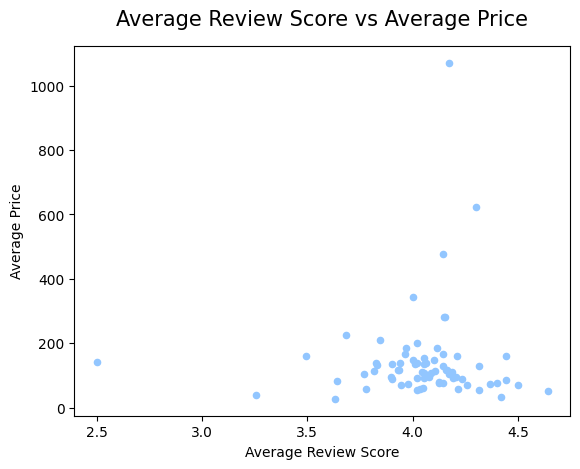

In [6]:
plt.style.use("seaborn-v0_8-pastel")
figure = price_review_df.plot(
    kind="scatter", 
    x="avg_review_score", 
    y="avg_price"
)
figure.set_title("Average Review Score vs Average Price", size=15, pad=15)
plt.xlabel("Average Review Score")
plt.ylabel("Average Price")
plt.savefig("price_review.png", bbox_inches='tight')